<a href="https://colab.research.google.com/github/aeonshao/DS3000-Final-Project/blob/main/Final_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Repository

### Problem Motivation

For many working people, finding ways to entertain oursleves outside of the 9-5 work time can be a challenge. Fortunately for us, we have movies and tv shows on a variety of platforms to keep us entertained. With the rise of streaming services such as Netflix and Hulu, people all over the world can easily access thousands of content, ranging from old movies to modern tv shows. However, for new movie and tv show makers, capturing the audience and making their content popular is a challenge. The film industry invests millions of dollars into producing and marketing movies, but predicting which movies will become popular remains very difficult. In fact, we have seen many examples of films with high budgets fail at the box office, while films that were made with smaller productions are able attract to attract large audiences and essentially dominate the film market. This uncertainty surrounding the popularity of upcoming movies needs to be addressed, especially for production studios, streaming platforms, and advertisers, as they need to be able to determine whether a particular movie fits in their category and can bring them financial success by attracting large amounts of people. The key questions are as follows:

What features are most strongly correlated with movie popularity?

Can we use these features to predict how popular a new movie might be before it is released?

Motivating sources:
- Sugarmaroon. “Factors Determining Movie Popularity.” journalia.blog, 28 Jan. 2025, journalia.blog/factors-determining-movie-popularity.
- “Reasonable Metric for ‘Popularity’ in Movies.” Movies & TV Stack Exchange, 4 Jan. 2014, movies.stackexchange.com/questions/16400/reasonable-metric-for-popularity-in-movies.
- How Is the Success of Films and TV Shows Measured? | IMDbPro. pro.imdb.com/content/article/entertainment-industry-resources/featured-articles/how-is-the-success-of-films-and-tv-shows-measured/GLFTC8ZLBBUSNTM3.

### Summary of the Data Processing Pipeline
1. Use TMDb API to retrieve raw data
2. Clean the data to prepare the data frame for visualization and analysis
3. Visualize using plotting libraries, such as Seaborn, Plotly, and Matplotlib

To retrieve and process the data, we will first connect to the TMDb (The Movie Database) API, which provides information about movies and television shows, including data such as genre Ids, release date, popularity score, vote count and more. This involves setting the headers and requesting data for popular movies and upcoming movies. The data we recieved is split up into pages, so we needed to add another function to go through a certain amount of pages and get a list of all the data entries so that we have enough data to conduct the analysis. Then, we will convert the data into a dataframe. We will check for missing or inconsistent values in columns, such as with the genre ID's, to make it more readable and easier to analyze. Next, we will address our key questions. We primarily want to compare popularity scores with other movie features, like vote average and vote count. We can perform more data analysis to create basic statistics and visualizations. We have both heatmaps and scatter plots to help demonstrate the relationships (using imported libraries Seaborn and Matplotlib), displaying popularity and votecounts for both popular movies and upcoming movies. These steps will help us address key questions related to film interest, voting patterns, and predictions for upcoming movie successes. Finally, the cleaned data will be prepared for machine learning by selecting relevant features for predictive modeling of movie successes.

Link to API: https://developer.themoviedb.org/reference/getting-started

In [ ]:
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import userdata
API_KEY = userdata.get("API_KEY")

url_popular = "https://api.themoviedb.org/3/movie/popular?language=en-US&page=1"

headers_popular = {
    "accept": "application/json",
    "Authorization": API_KEY
}

url_upcoming = "https://api.themoviedb.org/3/movie/upcoming?language=en-US&page=1"

headers_upcoming = {
    "accept": "application/json",
    "Authorization": API_KEY
}

response_popular = requests.get(url_popular, headers=headers_popular)

print(response_popular.text)

response_upcoming = requests.get(url_upcoming, headers=headers_upcoming)

print(response_upcoming.text)

{"page":1,"results":[{"adult":false,"backdrop_path":"/5h2EsPKNDdB3MAtOk9MB9Ycg9Rz.jpg","genre_ids":[16,35,12,10751,9648],"id":1084242,"original_language":"en","original_title":"Zootopia 2","overview":"After cracking the biggest case in Zootopia's history, rookie cops Judy Hopps and Nick Wilde find themselves on the twisting trail of a great mystery when Gary De’Snake arrives and turns the animal metropolis upside down. To crack the case, Judy and Nick must go undercover to unexpected new parts of town, where their growing partnership is tested like never before.","popularity":486.8344,"poster_path":"/oJ7g2CifqpStmoYQyaLQgEU32qO.jpg","release_date":"2025-11-26","title":"Zootopia 2","video":false,"vote_average":7.719,"vote_count":377},{"adult":false,"backdrop_path":"/6bzabqH399ioM3nZScwZtzGaHIy.jpg","genre_ids":[878,12,28],"id":533533,"original_language":"en","original_title":"TRON: Ares","overview":"A highly sophisticated Program called Ares is sent from the digital world into the real 

In [ ]:
import requests
import pandas as pd

base_url_popular = "https://api.themoviedb.org/3/movie/popular?language=en-US&page="
base_url_upcoming = "https://api.themoviedb.org/3/movie/upcoming?language=en-US&page="
headers = {
    "accept": "application/json",
    "Authorization": API_KEY
}

# get resuts from multiple pages
def fetch_all_movies(base_url, headers, pages=3):
    all_results = []
    for page in range(1, pages + 1):
        url = f"{base_url}{page}"
        response = requests.get(url, headers=headers)
        data = response.json()
        results = data.get("results", [])
        all_results = all_results + results
    return all_results

# convert movies to dataframe
def movies_to_df(movies):
    df = pd.DataFrame(movies, columns=[
        "genre_ids", "id", "original_language", "original_title",
        "overview", "popularity", "poster_path", "release_date",
        "title", "video", "vote_average", "vote_count"
    ])
    df = df.reset_index(drop=True)
    return df

# get multiple pages
popular_data = fetch_all_movies(base_url_popular, headers, pages=3)
upcoming_data = fetch_all_movies(base_url_upcoming, headers, pages=3)

# convert to dataframe
popular_df = movies_to_df(popular_data)
upcoming_df = movies_to_df(upcoming_data)

# print dataframe
print("Popular Movies (First 50 rows):")
display(popular_df.head(50))

print("Upcoming Movies (First 50 rows):")
display(upcoming_df.head(50))



Popular Movies (First 50 rows):


,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,"[16, 35, 12, 10751, 9648]",1084242,en,Zootopia 2,After cracking the biggest case in Zootopia's ...,486.8344,/oJ7g2CifqpStmoYQyaLQgEU32qO.jpg,2025-11-26,Zootopia 2,False,7.719,377
1,"[878, 12, 28]",533533,en,TRON: Ares,A highly sophisticated Program called Ares is ...,476.5187,/chpWmskl3aKm1aTZqUHRCtviwPy.jpg,2025-10-08,TRON: Ares,False,6.514,574
2,"[28, 14, 53]",1180831,no,Troll 2,When a dangerous new troll unleashes devastati...,473.4341,/p6xAExLNFbHcLfvSuvLPoM8aqZU.jpg,2025-11-30,Troll 2,False,6.812,165
3,"[28, 18, 14]",1083637,kn,ಕಾಂತಾರ: ಅಧ್ಯಾಯ - ೧,"During the Kadamba reign, King Vijayendra, the...",333.5730,/zBvw25afDn93embB8L7FzvTT2xq.jpg,2025-10-01,Kantara - A Legend: Chapter 1,False,6.975,40
4,"[27, 14, 10749]",1246049,fr,Dracula,When a 15th-century prince denounces God after...,233.3427,/ykyRfv7JDofLxXLAwtLXaSuaFfM.jpg,2025-07-30,Dracula,False,7.117,526
5,"[28, 80]",949709,zh,危机航线,"""Anyone? There is ......"" A mysterious message...",226.5158,/v8ySgr4CE45SrrIt4PqqYc1diW6.jpg,2024-09-29,High Forces,False,5.846,26
6,"[14, 16, 28, 878]",23527,ru,Первый отряд,Set during the opening days of World War II on...,226.0305,/hBj1aTnGf4564Klv9yIbSuB7Y8w.jpg,2009-05-13,First Squad: The Moment of Truth,False,6.298,126
7,"[27, 53]",1228246,en,Five Nights at Freddy's 2,One year since the supernatural nightmare at F...,222.3011,/am6O7221qGtb5ba5uJKw7PfPZkJ.jpg,2025-12-03,Five Nights at Freddy's 2,False,6.400,58
8,"[28, 53, 80]",1448560,en,Wildcat,An ex-black ops team reunite to pull off a des...,222.1713,/h893ImjM6Fsv5DFhKJdlZFZIJno.jpg,2025-11-19,Wildcat,False,5.875,28
9,"[28, 80, 53]",1419406,zh,捕风追影,Macau Police brings the tracking expert police...,218.2493,/e0RU6KpdnrqFxDKlI3NOqN8nHL6.jpg,2025-08-16,The Shadow's Edge,False,6.483,144


Upcoming Movies (First 50 rows):


,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,"[27, 53]",1228246,en,Five Nights at Freddy's 2,One year since the supernatural nightmare at F...,222.3011,/am6O7221qGtb5ba5uJKw7PfPZkJ.jpg,2025-12-03,Five Nights at Freddy's 2,False,6.300,63
1,"[28, 53, 80]",1448560,en,Wildcat,An ex-black ops team reunite to pull off a des...,222.1713,/h893ImjM6Fsv5DFhKJdlZFZIJno.jpg,2025-11-19,Wildcat,False,5.875,28
2,"[28, 80, 53]",1419406,zh,捕风追影,Macau Police brings the tracking expert police...,218.2493,/e0RU6KpdnrqFxDKlI3NOqN8nHL6.jpg,2025-08-16,The Shadow's Edge,False,6.483,144
3,"[14, 12, 10749]",967941,en,Wicked: For Good,As an angry mob rises against the Wicked Witch...,130.8404,/si9tolnefLSUKaqQEGz1bWArOaL.jpg,2025-11-19,Wicked: For Good,False,6.800,379
4,"[16, 28]",1539104,ja,劇場版 呪術廻戦「渋谷事変 特別編集版」×「死滅回游 先行上映」,A veil abruptly descends over the busy Shibuya...,116.1957,/tc7RrVW5FGvyO2tsgW6LIN1esHI.jpg,2025-11-07,JUJUTSU KAISEN: Execution -Shibuya Incident x ...,False,5.200,46
5,"[28, 53, 80]",1196573,en,She Rides Shotgun,Newly released from prison and marked for deat...,111.5820,/nvqW8mOm818QDio3GKKmPLK8kXj.jpg,2025-07-31,She Rides Shotgun,False,7.089,129
6,"[878, 80]",701387,en,Bugonia,Two conspiracy obsessed young men kidnap the h...,93.7883,/oxgsAQDAAxA92mFGYCZllgWkH9J.jpg,2025-10-23,Bugonia,False,7.502,652
7,"[878, 12, 14]",83533,en,Avatar: Fire and Ash,In the wake of the devastating war against the...,66.5587,/g96wHxU7EnoIFwemb2RgohIXrgW.jpg,2025-12-17,Avatar: Fire and Ash,False,0.000,0
8,"[10749, 18]",1327862,en,Regretting You,Morgan Grant and her daughter Clara explore wh...,61.9826,/z4gVnxTaks3anTycwKjDmvQSuWt.jpg,2025-10-22,Regretting You,False,7.110,132
9,"[27, 53]",507089,en,Five Nights at Freddy's,"Recently fired and desperate for work, a troub...",58.9761,/4dKRTUylqwXQ4VJz0BS84fqW2wa.jpg,2023-10-25,Five Nights at Freddy's,False,7.400,4655


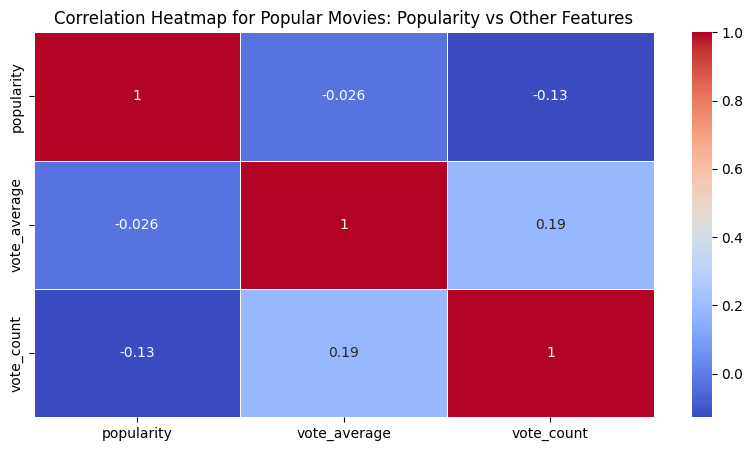

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ["popularity","vote_average","vote_count"]

popular_corr = popular_df[columns].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(popular_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Popular Movies: Popularity vs Other Features")
plt.show()

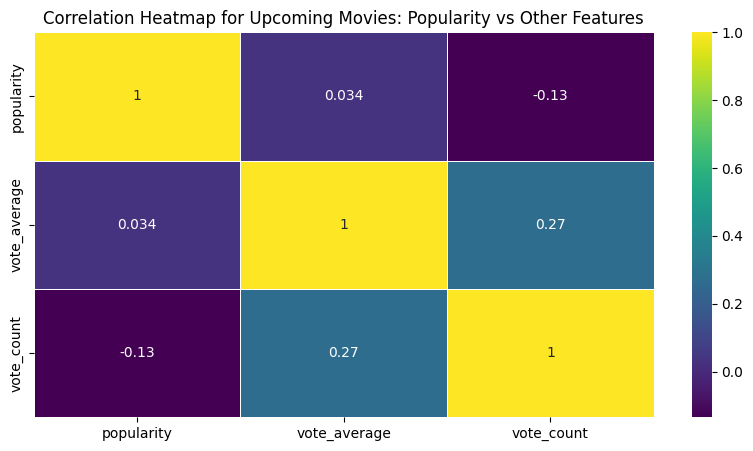

In [ ]:
upcoming_corr = upcoming_df[columns].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(upcoming_corr, annot=True, cmap="viridis", linewidths=0.5)
plt.title("Correlation Heatmap for Upcoming Movies: Popularity vs Other Features")
plt.show()

Popular movies:
- More popular movies tend to have slightly lower average ratings, suggesting mainstream appeal does not always mean higher quality scores
- Popularity is weakly negatively correlated with vote count and this indicates that the most popular movies do not have the most ratings
- Movies with higher average ratings tend to have more votes, showing quality attracts more reviewers

Upcoming movies:
- Popularity and vote average have a weak positive correlation for upcoming movies, the opposite of popular movies, suggesting hype builds for anticipated quality releases
- Popularity is negatively correlated with vote count and this means that highly anticipated movies have not received many ratings
- Vote average and vote count show similar positive correlation as in popular movies, maintaining the pattern that quality attracts engagement

The popularity-quality relationship flips from negative for (popular movies) to positive (upcoming movies). This shows that established movies may succeed despite average quality while unreleased films generate buzz based on expected quality

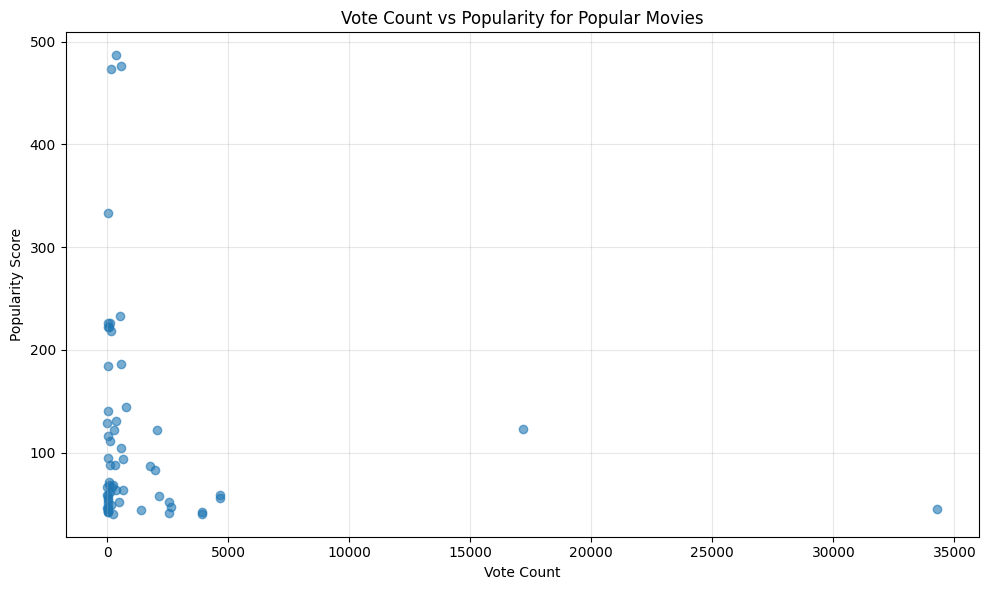

Correlation between Vote Count and Popularity: -0.128


In [ ]:
# scatter plot

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(popular_df['vote_count'],
            popular_df['popularity'],
            alpha=0.6)

plt.xlabel('Vote Count')
plt.ylabel('Popularity Score')
plt.title('Vote Count vs Popularity for Popular Movies')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#for correlation

correlation = popular_df[['vote_count', 'popularity']].corr().iloc[0, 1]
print(f"Correlation between Vote Count and Popularity: {correlation:.3f}")

The scatter plot above displays the relationship between how many people voted on a movie and its popularity score with each dot repsenting one popular movie, where its position shows both its vote count and popularity. The correlation coefficient (-0.120) shows a very weak negative corelation between vote count and popularity score meaning that having more votes does not strongly predict higher popularity scores.

In [ ]:
# scatter plot for upcoming movies

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(upcoming_df['vote_count'],
            upcoming_df['popularity'],
            alpha=0.6,
            color='coral')

plt.xlabel('Vote Count')
plt.ylabel('Popularity Score')
plt.title('Vote Count vs Popularity for Upcoming Movies')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#for correlation

correlation = upcoming_df[['vote_count', 'popularity']].corr().iloc[0, 1]
print(f"Correlation between Vote Count and Popularity: {correlation:.3f}")

The scatter plot above displays the relationship between how many people voted on an upcoming movie and its popularity score with each dot representing one upcoming movie, where its position shows both its vote count and popularity. The correlation coefficient (-0.138) shows a very weak negative correlation between vote count and popularity score meaning that having more votes does not strongly predict higher popularity scores for upcoming releases.

# Phase 2: Simple Linear Regression

In [ ]:
def add_bias_column(X):
    """ adds a bias columm
    Args:
        X (array): can be either 1-d or 2-d

    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """

    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])

    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])

    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

In [ ]:
X = popular_df["vote_count"].values
y = popular_df["popularity"].values
X = X.reshape(-1, 1)
X_withBias = add_bias_column(X)
linReg = np.linalg.inv(X_withBias.T @ X_withBias) @ X_withBias.T @ y
intercept = linReg[0]
slope = linReg[1]
y_pred = X_withBias @ linReg
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r2 = 1 - (ss_residual / ss_total)
mse = np.mean((y - y_pred)**2)
print("MSE:", mse)
print("R² Score:", r2)


MSE: 10396.10369155371
R² Score: 0.007381431711550035


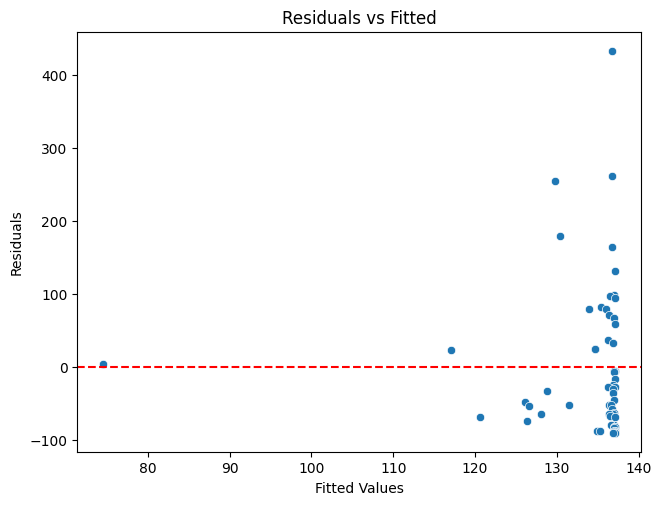

In [ ]:
residuals = y - y_pred
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

This plot shows a funnel pattern where the variance of residuals increase with larger fitted values, particularly at the right side around 124-125 where most observations are concentrated. The residuals range from approximately -100 to over 350, with several extreme positive values appearing at higher fitted values. This pattern shows that the model's prediction errors are not constant across different levels of the response variable.

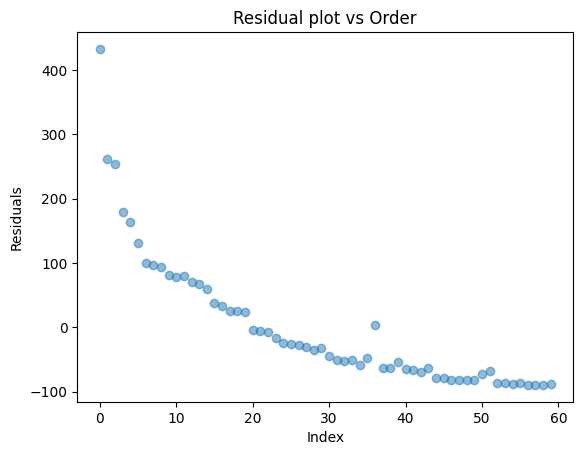

In [ ]:
plt.scatter(range(len(X)), residuals, alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residual plot vs Order")
plt.show()

This plot displays a clear downward trend where residuals begin at very high positive values around 350 for early observations and progressively decline to negative values around negative 100 for later observations. The pattern indicates that the residuals are not independent and instead have strong autocorrelation based on observation order. This systematic structure suggests the presence of a time based or sequential component that creates predictable patterns in the residuals.

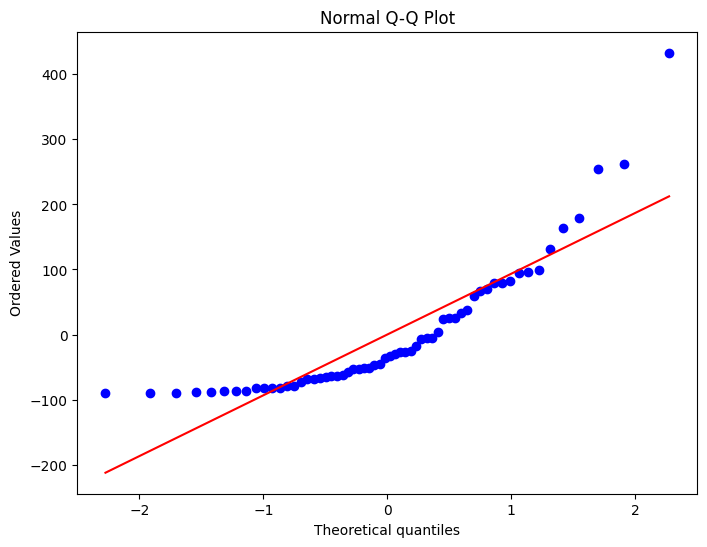

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt


residuals = y - y_pred
plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

This plot shows considerable deviation from normality, mainly in the tails, where the points fall considerably off the diagonal red line. The right tail is heavy; that is, there are extreme values in the upper right part of the figure, which indicates that the residuals are positively skewed and may contain outliers, or the linear model might not appropriately model the relationship within the data.

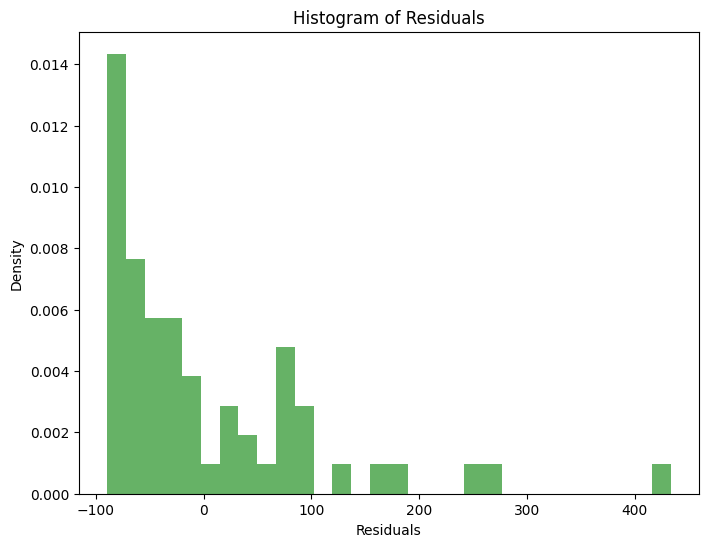

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

This histogram shows a very right-skewed distribution with most residuals concentrated near -100 and extending up to a long tail to the right, at positive values around 350. The distribution is far from the symmetric bell shape expected under normality. It confirms the violation of the normality assumption of linear regression regarding this model.

In [ ]:
import pandas as pd

# All of the genres and their numerical labels according to TMDB
GENRE_MAP = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

def preprocess_movie_data(df):
  """
  Preprocess movie dataset for ML.
  Makes sure that the dataframe has numerical fields

  """
  df[["popularity", "vote_average", "vote_count"]] = df[
      ["popularity", "vote_average", "vote_count"]
  ].apply(pd.to_numeric, errors="coerce")

  #handle the date format styling yyyy-mm-dd
  df["release_date"] = pd.to_datetime(df["release_date"],
                                      errors="coerce").dt.strftime("%Y-%m-%d")

  #change the languages into numbers
  df["original_language"] = df["original_language"].astype("category").cat.codes

  #change the genres into separate columns
  for genre_id, genre_name in GENRE_MAP.items():
    df[genre_name] = df["genre_ids"].apply(has_genre, args=(genre_id,))

  keep_columns = ["id", "original_language", "popularity", "release_date",
                  "vote_average", "vote_count"] + list(GENRE_MAP.values());
  df = df[keep_columns].copy()
  df.dropna(subset=["popularity", "vote_average", "vote_count", "release_date"],
            inplace=True)
  return df

#helper to see if there is already the gnere
def has_genre(genre_list, genre_id):
    if isinstance(genre_list, list):
        return int(genre_id in genre_list)
    return 0


final_df = pd.concat([popular_df, upcoming_df], ignore_index=True);
final_df_cleaned = preprocess_movie_data(final_df)

# action, adventure
# horror, thriller
# crime, mystery

base_columns = ["id", "original_language", "popularity", "release_date",
                "vote_average", "vote_count"]

df_action_adventure = final_df_cleaned.copy()
df_action_adventure["genre"] = (
    (df_action_adventure["Action"]==1) | (df_action_adventure["Adventure"]==1)
).astype(int)
df_action_adventure = df_action_adventure[base_columns + ["genre"]]

df_horror_thriller = final_df_cleaned.copy()
df_horror_thriller["genre"] = (
    (df_horror_thriller["Horror"]==1) | (df_horror_thriller["Thriller"]==1)
).astype(int)
df_horror_thriller = df_horror_thriller[base_columns + ["genre"]]

df_crime_mystery = final_df_cleaned.copy()
df_crime_mystery["genre"] = (
    (df_crime_mystery["Crime"]==1) | (df_crime_mystery["Mystery"]==1)
).astype(int)
df_crime_mystery = df_crime_mystery[base_columns + ["genre"]]

display(df_action_adventure.head(10))
display(df_horror_thriller.head(10))
display(df_crime_mystery.head(10))


,id,original_language,popularity,release_date,vote_average,vote_count,genre
0,1419406,1,569.8770,2025-08-16,6.374,91,1
1,1363123,1,398.4084,2025-11-11,6.568,88,1
2,1062722,1,384.5713,2025-10-17,7.800,1724,0
3,1054867,1,309.9881,2025-09-23,7.490,1575,1
4,1116465,15,300.6833,2024-07-05,6.672,94,1
5,1033462,15,268.0200,2024-10-01,4.235,17,1
6,1084222,1,236.2452,2024-12-12,6.784,44,1
7,1128650,15,233.2849,2024-12-08,6.721,140,1
8,1481331,1,231.6562,2025-02-06,3.250,8,0
9,1242898,1,217.0943,2025-11-05,7.400,413,1


,id,original_language,popularity,release_date,vote_average,vote_count,genre
0,1419406,1,569.8770,2025-08-16,6.374,91,1
1,1363123,1,398.4084,2025-11-11,6.568,88,0
2,1062722,1,384.5713,2025-10-17,7.800,1724,1
3,1054867,1,309.9881,2025-09-23,7.490,1575,1
4,1116465,15,300.6833,2024-07-05,6.672,94,0
5,1033462,15,268.0200,2024-10-01,4.235,17,0
6,1084222,1,236.2452,2024-12-12,6.784,44,1
7,1128650,15,233.2849,2024-12-08,6.721,140,1
8,1481331,1,231.6562,2025-02-06,3.250,8,0
9,1242898,1,217.0943,2025-11-05,7.400,413,0


,id,original_language,popularity,release_date,vote_average,vote_count,genre
0,1419406,1,569.8770,2025-08-16,6.374,91,1
1,1363123,1,398.4084,2025-11-11,6.568,88,0
2,1062722,1,384.5713,2025-10-17,7.800,1724,0
3,1054867,1,309.9881,2025-09-23,7.490,1575,1
4,1116465,15,300.6833,2024-07-05,6.672,94,0
5,1033462,15,268.0200,2024-10-01,4.235,17,0
6,1084222,1,236.2452,2024-12-12,6.784,44,0
7,1128650,15,233.2849,2024-12-08,6.721,140,1
8,1481331,1,231.6562,2025-02-06,3.250,8,0
9,1242898,1,217.0943,2025-11-05,7.400,413,0


In [ ]:
def line_of_best_fit(X, y):
    """ returns a vector containing the coefficients for the line of best fit, including an intercept term
    Args:
        X (array): either 1-d or 2-d which includes all the predictor values, not including bias term
        y (array): a 1-d array which includes all corresponding response values to X

    Returns:
        m (array): the vector containing the coefficients for the line of best fit, including an intercept term
    """
    # adds a bias column to X
    X_new = add_bias_column(X)
    # calculates the line of best fit
    XtXinv = np.linalg.inv(np.matmul(X_new.T, X_new))
    m = np.matmul(XtXinv, np.matmul(X_new.T, y))
    return m

In [ ]:
def linreg_predict(Xnew, ynew, m):
    """ returns a dictionary containing: the predicted values from applying m to Xnew, the residuals,
    the mean squared error, and the coefficient of determination

    Args:
        Xnew (array): an array, either 1-d or 2-d which includes all the predictor features, not including bias term
        ynew (array): a 1-d array which includes all corresponding response values to Xnew
        m (array): a 1-d array of length which contains the coefficients from the line_of_best_fit function

    Returns:
        output_dict (dictionary): a dictionary that has:
            - 'ypreds' (the predicted values from applying m to Xnew)
            - 'resids' (the residuals, the differences between ynew and ypreds)
            - 'mse' (the mean squared error)
            - 'r2' (the coefficient of determination representing the proportion of variability in ynew explained by the line of best fit
    """
    # initializes an output dictionary for required values
    output_dict = {}
    # adds a bias column to the Xnew array
    Xnew_bias_added = add_bias_column(Xnew)
    # calculates the line of best fit for Xnew with bias and ynew
    # gets the predicted values from applying m to Xnew
    ypreds = np.matmul(Xnew_bias_added, m)
    # gets the residuals
    res = ynew - ypreds
    # gets the mean squared error
    mse = (res**2).mean()
    # gets the R^2
    r2 = r2_score(ynew, ypreds)
    # adds values to the dictionary
    output_dict['ypreds'] = ypreds
    output_dict['resids'] = res
    output_dict['mse'] = mse
    output_dict['r2'] = r2
    return output_dict

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def fit_polynomial_model(df, x_col="vote_count", y_col="popularity", degree=4, test_size=0.3, seed=3):
    """
    Fits a simple polynomial regression model using one numeric predictor column.

    Args:
        df (DataFrame): The input dataset containing predictor and target columns.
        x_col (str): Name of the numeric predictor column.
        y_col (str): Name of the target column to predict.
        degree (int): Degree of the polynomial expansion.
        test_size (float): Proportion of data to use for testing.
        seed (int): Random seed for reproducibility in train/test split.

    Returns:
        dict: A dictionary containing:
            - "model_coeffs": Coefficients of the fitted model.
            - "poly_transformer": The PolynomialFeatures transformer.
            - "Xtrain_shape": Shape of the training predictor matrix.
            - "Xtest_shape": Shape of the testing predictor matrix.
            - "mse": Mean Squared Error.
            - "r2": R² score.
            - "ypreds": Predicted values.
            - "ytest": Actual target value.
    """

    #extract x and y
    X = np.array(df[x_col]).reshape(-1, 1)
    y = np.array(df[y_col])

    #create polynomial features up
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_poly, y, test_size=test_size, random_state=seed)

    #fit using the linear regression + evaluate test split
    m = line_of_best_fit(Xtrain, ytrain)
    results = linreg_predict(Xtest, ytest, m)

    #information
    return {
        "model_coeffs": m,
        "poly_transformer": poly,
        "Xtrain_shape": Xtrain.shape,
        "Xtest_shape": Xtest.shape,
        "mse": results["mse"],
        "r2": results["r2"],
        "ypreds": results["ypreds"],
        "ytest": ytest,
        "residuals": results["resids"]
    }


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

def fit_poly_with_genre(df, x_col="vote_count", genre_col="genre", y_col="popularity", degree=2, test_size=0.3, seed=3):
    """
    Fits a polynomial regression model using one numeric predictor plus a genre dummy variable.

    Args:
        df (DataFrame): The input dataset containing predictor and target columns.
        x_col (str): Name of the numeric predictor column.
        genre_col (str): Name of the genre indicator column.
        y_col (str): Name of the target column to predict.
        degree (int): Degree of the polynomial expansion applied to the numeric predictor.
        test_size (float): Proportion of data to use for testing.
        seed (int): Random seed for reproducibility in train/test split.

    Returns:
        dict: A dictionary containing:
            - "model_coeffs": Coefficients of the fitted regression model.
            - "poly_transformer": The PolynomialFeatures transformer.
            - "Xtrain_shape": Shape of the training predictor matrix.
            - "Xtest_shape": Shape of the testing predictor matrix.
            - "mse": Mean Squared Error.
            - "r2": R² score.
    """
    x = df[x_col].to_numpy().reshape(-1, 1)
    g = df[genre_col].to_numpy().reshape(-1, 1)  # 0/1
    y = df[y_col].to_numpy()

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly.fit_transform(x)

    #concatenate genre as a separate predictor
    X = np.hstack([x_poly, g])

    #train test
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size, random_state=seed)

    #fit the line
    m = line_of_best_fit(Xtrain, ytrain)
    results = linreg_predict(Xtest, ytest, m)

    return {
        "model_coeffs": m,
        "poly_transformer": poly,
        "Xtrain_shape": Xtrain.shape,
        "Xtest_shape": Xtest.shape,
        "mse": results["mse"],
        "r2": results["r2"],
        "residuals": results["resids"],
        "y_pred": results["ypreds"]
    }


In [ ]:
predictor = "vote_count"

# Action/Adventure
res_action_adv = fit_poly_with_genre(df_action_adventure, x_col=predictor, genre_col="genre", degree=2)
print("Action/Adventure — degree 2")
print("MSE:", round(res_action_adv["mse"], 3))
print("R^2:", round(res_action_adv["r2"], 4))
print("Train shape:", res_action_adv["Xtrain_shape"], "Test shape:", res_action_adv["Xtest_shape"])

# Horror/Thriller
res_horror_thrill = fit_poly_with_genre(df_horror_thriller, x_col=predictor, genre_col="genre", degree=2)
print("\nHorror/Thriller — degree 2")
print("MSE:", round(res_horror_thrill["mse"], 3))
print("R^2:", round(res_horror_thrill["r2"], 4))
print("Train shape:", res_horror_thrill["Xtrain_shape"], "Test shape:", res_horror_thrill["Xtest_shape"])

# Crime/Mystery
res_crime_myst = fit_poly_with_genre(df_crime_mystery, x_col=predictor, genre_col="genre", degree=2)
print("\nCrime/Mystery — degree 2")
print("MSE:", round(res_crime_myst["mse"], 3))
print("R^2:", round(res_crime_myst["r2"], 4))
print("Train shape:", res_crime_myst["Xtrain_shape"], "Test shape:", res_crime_myst["Xtest_shape"])

Action/Adventure — degree 2
MSE: 6101.521
R^2: 0.1535
Train shape: (84, 3) Test shape: (36, 3)

Horror/Thriller — degree 2
MSE: 7479.828
R^2: -0.0377
Train shape: (84, 3) Test shape: (36, 3)

Crime/Mystery — degree 2
MSE: 9008.385
R^2: -0.2498
Train shape: (84, 3) Test shape: (36, 3)


Based on the results, it looks like doing the polynomial regression model on the crime and mystery columns. We can then plot the residuals to see if there is any relationship definitively.


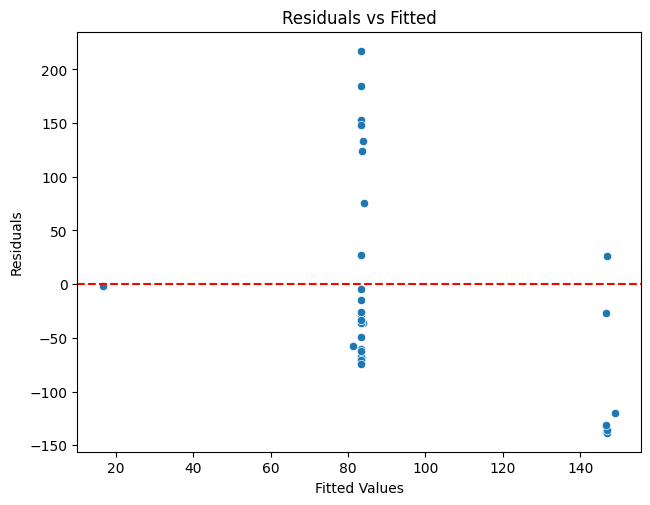

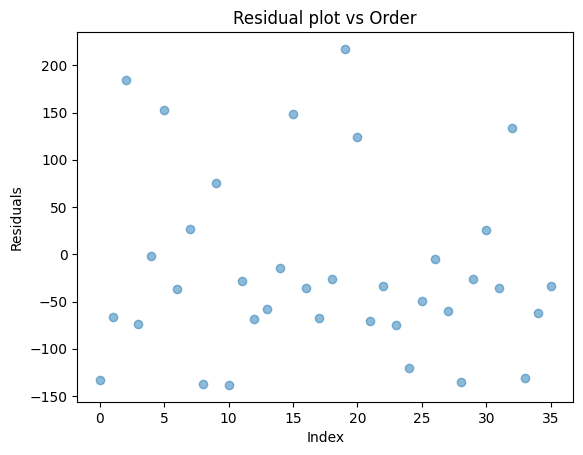

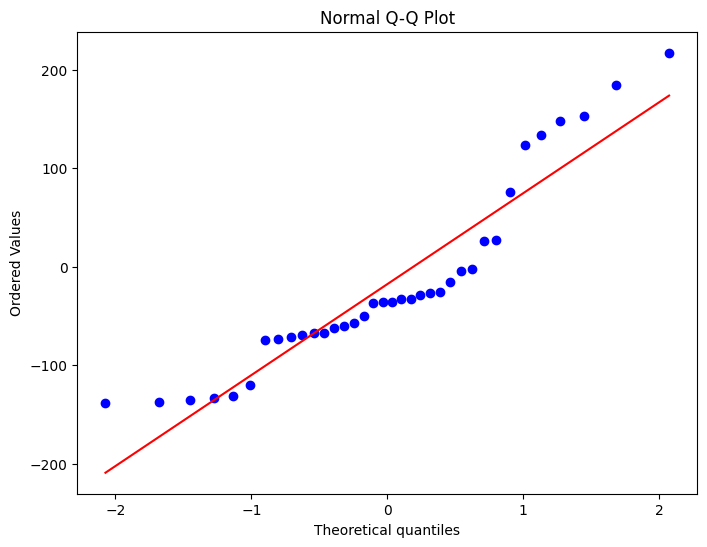

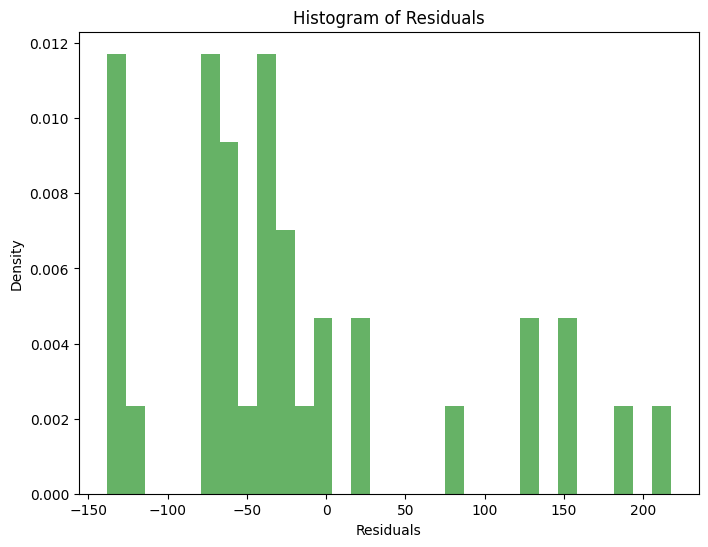

In [ ]:
residuals = res_crime_myst["residuals"]
X = np.array(res_crime_myst["residuals"])
y_pred = res_crime_myst["y_pred"]

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

plt.scatter(range(len(X)), residuals, alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residual plot vs Order")
plt.show()

plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# **Conclusion**

From the above results of the diagnosis and modeling plots, our findings support the existence of extreme problems in the regression models of the popularity of movies when using simple regression models. The results of the first regression model when the vote count was the predictor showed an extraordinarily poor value of R² of only 0.0477 that explained less than 5% of the variance of the popularity. However, the results of the polynomial regression when the factors of genre pairs of three different classifications of movies: (Action & Adventure), (Horror & Thriller), and (Crime & Mystery), were used showed that only the Crime & Mystery model had a positive R² value of 0.0598, while the others were poorer. The continuous failure of the assumptions of regression models of the heteroscedasticity (funnel distribution of residuals of the regression model of residuals), of high levels of Autocorrelation of residuals (systematic pattern of order of residuals of the regression model of residuals), and of large deviations of Normality of the residuals of the regression model of residuals provide the strongest possible support that the factors which contribute to the popularity of movies do not work as complex non-linear phenomena which the models above fail.


As far as the ethics are concerned, the models of predicting the popularity of a movie may ultimately result in the same biases being encouraged that already exist in the movie industry. The models of prediction may ultimately work against the less represented voices in the form of indie movies that do not necessarily subscribe to the models of popularity of the previous films. The culture of predicting the success of films may also create homogeneity when production houses may ultimately believe in the films that are predicted to be successes rather than being bold and diverse.
